<a href="https://colab.research.google.com/github/Abdelrahman-Wael-1029/Supervised_assignments/blob/main/assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
#read data
df = pd.read_csv('PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [123]:
df.describe().T

,count,unique,top,freq
Outlook,14,3,Sunny,5
Temperature,14,3,Mild,6
Humidity,14,2,High,7
Wind,14,2,Weak,8
Play Tennis,14,2,Yes,9


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play Tennis  14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [125]:
def entropy(p, n):

  if p + n == 0:
    return 0

  p_prob = p / (p + n)
  n_prob = n / (p + n)

  if p_prob == 0 or n_prob == 0:
    return 0

  return - (p_prob * np.log2(p_prob) + n_prob * np.log2(n_prob))

In [126]:

def average_entropy(df, feature_column, label_column):
  sum = 0;
  p = len(df[df[label_column] == 'Yes'])
  n = len(df[df[label_column] == 'No'])
  for value in df[feature_column].unique():
    sub_df = df[df[feature_column] == value]
    Nvalue = len(sub_df[sub_df[label_column] == 'No'])
    Pvalue = len(sub_df[sub_df[label_column] == 'Yes'])
    sum += entropy(Pvalue, Nvalue) * (Pvalue + Nvalue) / (p + n)

  return sum



In [127]:
def gain(entropy, averge_entropy):
  return entropy - averge_entropy


In [128]:
p = len(df['Outlook'][df['Play Tennis'] == 'Yes'])
n = len(df['Outlook'][df['Play Tennis'] == 'No'])
gain(entropy(p, n), average_entropy(df, 'Outlook', 'Play Tennis'))

0.24674981977443922

In [129]:
countId = 0
class Node():
    def __init__(self, name, children = {}):
      global countId
      self.id = countId
      self.name = name
      self.children = children
      countId = countId +  1
    def __str__(self):
      return self.name

In [130]:
ids  = {}
class build_tree():
  def __init__(self, df):
    max_key =self.maxGain(df)
    self.root = Node(max_key, {})
    ids[self.root.id] = self.root.name
    self.build(self.root, df)

  def build(self, root, df):
    max_key = self.maxGain(df)
    root.name = max_key
    ids[root.id] =root.name
    root.children  = {}
    for i in df[max_key].unique():
      sub_df = df[df[max_key] == i];
      p =len(sub_df[df['Play Tennis'] == 'Yes']);
      n = len(sub_df[df['Play Tennis'] == 'No']);
      entropy_column = entropy(p, n);
      if(entropy_column == 0):
        node =  Node('Yes') if n == 0 else Node('No')
        ids[node.id] =node.name
        root.children[i] =node
      else:
        node = Node(i,{})

        self.build(node, sub_df.drop(max_key, axis = 1))
        root.children[i] = node


  def maxGain(self, df):
    gains = {}
    for i in df.columns:
      if(i == 'Play Tennis'):
        continue
      p = len(df[i][df['Play Tennis'] == 'Yes'])
      n = len(df[i][df['Play Tennis'] == 'No'])
      gains[i] = gain(entropy(p, n), average_entropy(df, i, 'Play Tennis'))
    return max(gains, key=gains.get)

In [131]:
tree = build_tree(df)

<ipython-input-130-b9ab1124176a>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p =len(sub_df[df['Play Tennis'] == 'Yes']);
<ipython-input-130-b9ab1124176a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n = len(sub_df[df['Play Tennis'] == 'No']);
<ipython-input-130-b9ab1124176a>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p =len(sub_df[df['Play Tennis'] == 'Yes']);
<ipython-input-130-b9ab1124176a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n = len(sub_df[df['Play Tennis'] == 'No']);
<ipython-input-130-b9ab1124176a>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p =len(sub_df[df['Play Tennis'] == 'Yes']);
<ipython-input-130-b9ab1124176a>:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n = len(sub_df[df['Play Tennis'] == 'No']);


(1, 'Humidity')
(4, 'Yes')
(5, 'Wind')
(2, 'No')
(3, 'Yes')
(6, 'Yes')
(7, 'No')


<ipython-input-132-28bfc0f87bec>:19: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog="dot")  # Hierarchical layout


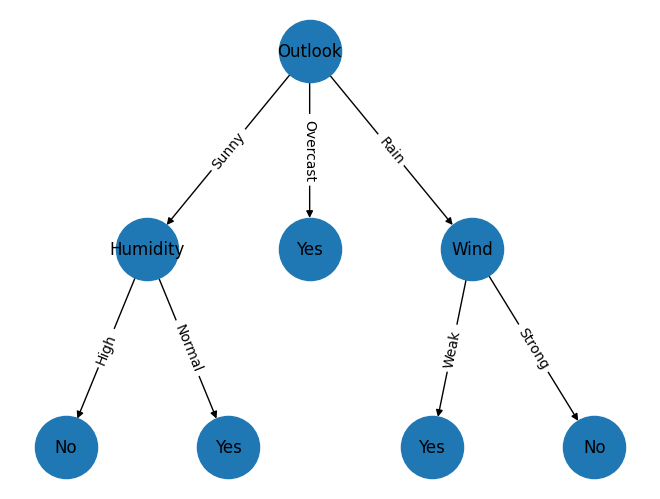

In [132]:
import networkx as nx
import matplotlib.pyplot as plt

def add_nodes_and_edges(G,node):
    G.add_node(node.id)

    for label_name, child in node.children.items():
        print((child.id, child.name))
        G.add_edge(node.id, child.id, label=label_name)

    for child_node in node.children.values():
        add_nodes_and_edges(G,child_node)


G = nx.DiGraph()

add_nodes_and_edges(G,tree.root)

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog="dot")  # Hierarchical layout

labels = dict([(i, ids[i]) for i in G.nodes()])
nx.draw(G, pos, with_labels=True, node_size=2000, arrows=True, labels= labels)

edge_labels = dict([((u, v,), d['label'])
                    for u, v, d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()